In [1]:
from fastai.vision.all import *
from fastbook import *
import torch
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

In [35]:
import pandas as pd
a_seven = TF.to_tensor(Image.open((path/'train'/'7').ls()[0])).squeeze()
df = pd.DataFrame(a_seven[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.380392,0.992157,0.662745,0.541176,0.133333,0.050980,0.094118,0.094118,0.258824,0.541176,0.498039,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.992157,0.988235,0.988235,0.988235,0.988235,0.831373,0.988235,0.988235,0.988235,0.988235,0.901961,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.333333,0.992157,0.988235,0.988235,0.988235,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.901961,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.454902,0.992157,0.988235,0.988235,0.988235,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.901961,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.862745,0.992157,0.988235,0.866667,0.909804,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.698039,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.866667,1.000000,0.992157,0.513726,0.000000,0.000000,0.000000,0.223529,0.992157,0.992157,0.952941,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.454902,0.992157,0.988235,0.717647,0.000000,0.000000,0.019608,0.698039,0.988235,0.988235,0.458824,0.000000,0.000000,0.000000


In [37]:
train_path = path/'train'
three_path = train_path/'3'
seven_path = train_path/'7'
valid_path = path/'valid'

In [41]:
def avg_img(dir): return torch.stack([TF.to_tensor(Image.open(p)).squeeze() for p in dir.ls()]).mean(0)
avg_three = stacked_threes.mean(0)
avg_seven = stacked_seven

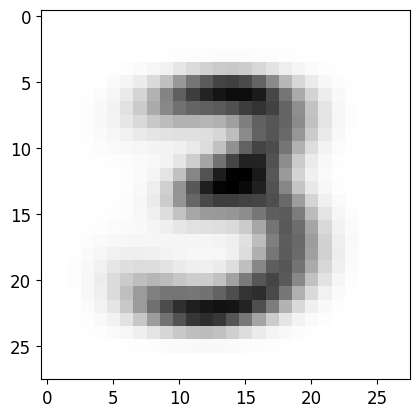

In [54]:
plt.imshow(avg_three) # or show_image(avg_three)

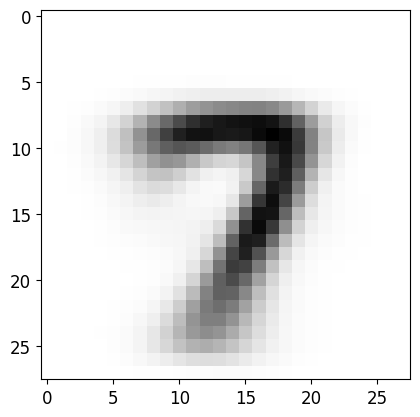

In [56]:
plt.imshow(avg_seven)

In [85]:
def diff(a, b): return (a-b).abs().mean((-1, -2)) 
# calculate mean over last and second to last dimension, think bcs if we get a single image we end up with a single value, but if we have list of img (ndims=3) we end up with a list of diffs
def is_three(a): return diff(a, avg_seven) > diff(a, avg_three)

In [60]:
seven_diff = diff(random_seven, avg_seven)
three_diff = diff(random_seven, avg_three)
is_three(random_seven).int()

(tensor(0.1154), tensor(0.1311))

In [78]:
dirs = '3', '7'
valid_threes = []
valid_sevens = []
for d in dirs:
    p = valid_path/d
    for impath in p.ls():
        elem = TF.to_tensor(Image.open(impath)).squeeze()
        if d == '3':
            valid_threes.append(elem)
        else:
            valid_sevens.append(elem)
            


In [79]:
accuracy3 = torch.tensor([(is_three(i) == 1) for i in valid_threes]).float().mean()
accuracy7 = torch.tensor([(is_three(i) == 0) for i in valid_sevens]).float().mean()
accuracy3, accuracy7

In [84]:

valid_threes = torch.stack([TF.to_tensor(Image.open(p)).squeeze() for p in (valid_path/'3').ls()])
valid_threes = valid_threes.float()/255

valid_sevens = torch.stack([TF.to_tensor(Image.open(p)).squeeze() for p in (valid_path/'7').ls()])
valid_sevens = valid_sevens.float()/255

In [86]:
diff3 = diff(valid_threes, avg_three)
diff3.shape

torch.Size([1010])

In [92]:
avg_three = avg_three.float()/255

In [94]:
accuracy3 = is_three(valid_threes).float().mean()
accuracy3

tensor(0.9168)

In [93]:
avg_seven = avg_seven.float()/255

In [96]:
accuracy7 = (1-is_three(valid_sevens).float()).mean()

In [97]:
accuracy7

tensor(0.9854)

In [99]:
total_accuracy = (accuracy7*valid_sevens.shape[0] + accuracy3 * valid_threes.shape[0])/(valid_sevens.shape[0] + valid_threes.shape[0])
total_accuracy

tensor(0.9514)

In [100]:
weights = torch.randn((28*28, 1))

In [101]:
stacked_threes = torch.stack([TF.to_tensor(Image.open(p)).squeeze() for p in three_path.ls()])
stacked_sevens = torch.stack([TF.to_tensor(Image.open(p)).squeeze() for p in seven_path.ls()])


In [102]:
trainset = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [106]:
y = torch.tensor([1]*stacked_threes.shape[0] + [0]*stacked_sevens.shape[0]) #.unsqueeze(1)

In [108]:
dset = list(zip(trainset, y))

In [109]:
x, my = dset[0]

In [110]:
x.shape, my

(torch.Size([784]), tensor(1))

still need: 
- function to calculate loss ? 
- use Dataloader to get batch
- use sigmoid to make sure your output is between 0 and 1

In [1]:
bias = torch.randn((1,1))
def predict(x): return x@weights + bias

def sigmoid(x): return 1/(1+torch.exp(-x))

NameError: name 'torch' is not defined